In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
from torch import nn
from torchvision import datasets
import torch.optim as optim
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader,TensorDataset
import torch.nn.functional as F
import matplotlib.pyplot as plt
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
import random

In [125]:
fo=open("../LinearDifferentvalues/testing_writingvalues_Linear0to1.txt", "r")
L=[]
A=[]
B=[]
#fe=open("dataset_params.txt",'w')
for i in range(0,121):
    line=fo.readline()
    #fe.write(line)
    #line=line[1:-2] #remove double quotes 
    #param = [j for j in line.split()]
    #print(param)
    #chrname.append(param[1])
    #g1.append(param[2])
    #g2.append(param[3])
    line=fo.readline()
    l = [j for j in line.split()]
    L.append([int(i) for i in l])
    line=fo.readline()
    a = [j for j in line.split()]
    A.append([float(i) for i in a])
    line=fo.readline()
    b = [j for j in line.split()]
    B.append([float(i) for i in b])
dataset_linear = [i for i in zip(L,A,B)]
fo.close()

In [124]:
training_data=torch.tensor(dataset_linear[84])

NameError: name 'dataset_linear' is not defined

In [101]:
#creating a continuous dataset 
L=np.random.binomial(1,0.5,1000)
A= 3*L + np.random.normal(0,1,1000)
B= 3*A + np.random.normal(0,1,1000)

In [91]:
L

array([0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,

In [102]:
L=np.reshape(np.array(L),(len(L),-1))
A=np.reshape(np.array(A),(len(A),-1))
B=np.reshape(np.array(B),(len(B),-1))

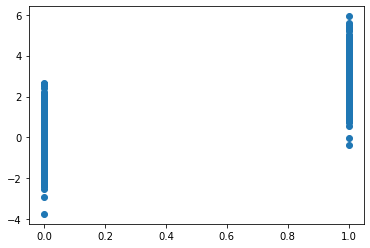

In [93]:
plt.scatter(L,A)

In [126]:
L=np.reshape(np.array(dataset_linear[84][0]),(len(dataset_linear[84][0]),-1))

In [10]:
L

array([-6.27011557e-01, -1.71458349e+00, -1.48262904e+00,  1.71963029e+00,
       -4.05863079e-01, -5.06652688e-01, -1.30114584e+00, -1.09563199e+00,
       -2.29255545e-01, -1.31616113e-01, -2.98028166e-02,  1.09249755e+00,
        3.55620315e-01, -1.04477242e+00, -9.67140041e-01,  6.20294349e-01,
       -3.90938587e-01, -5.78362294e-01,  8.30238038e-01, -1.22442944e+00,
        2.13081314e-01,  4.36624530e-02,  4.32089437e-01, -1.74830972e-01,
       -2.43846604e+00,  1.31419362e+00,  1.39542556e+00, -1.43446960e+00,
        1.61960176e+00,  5.45262274e-01, -1.64032682e+00, -1.96753196e-01,
       -8.42144834e-02, -7.08278974e-01,  2.92405611e-01,  4.88486646e-01,
       -3.94595499e-01,  1.03494205e+00,  5.24105682e-01, -5.73637347e-01,
       -5.36868604e-01, -6.71157901e-01, -1.08223777e+00, -1.98637772e-01,
       -9.85785244e-01, -6.61696442e-01, -2.25146747e-01,  4.31123386e-01,
       -1.16379392e+00,  7.04872855e-01, -9.43560257e-01, -7.73266046e-01,
       -1.54336579e+00, -

In [127]:
L_shuffle=np.random.permutation(L)

In [128]:
L_shuffle

array([[1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
    

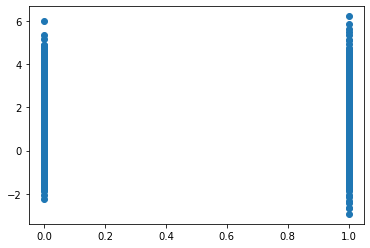

In [105]:
plt.scatter(L_shuffle,A)

In [129]:
A=np.reshape(np.array(dataset_linear[84][1]),(len(dataset_linear[84][1]),-1))

In [130]:
A

array([[ 3.93970503e-02],
       [-1.58160513e+00],
       [ 1.19562190e+00],
       [ 3.00563212e+00],
       [ 1.35561166e-01],
       [-1.10215141e-01],
       [-1.61608170e+00],
       [-5.34638246e-01],
       [-1.02902993e+00],
       [ 1.05770042e-01],
       [ 1.02695765e+00],
       [ 3.05092572e-01],
       [-2.28320129e-01],
       [ 6.95511438e-01],
       [ 1.89033668e-01],
       [ 1.45142761e+00],
       [ 1.22931658e+00],
       [ 1.24576412e+00],
       [-7.03811767e-02],
       [ 8.19134391e-01],
       [ 6.51327136e-01],
       [ 4.68354670e-01],
       [ 1.61473374e+00],
       [ 1.50669804e+00],
       [ 9.45824657e-01],
       [-1.36965348e+00],
       [ 1.05067887e-01],
       [-1.34402745e+00],
       [-1.20651552e+00],
       [-3.05968943e-01],
       [ 7.24450193e-01],
       [-6.00526157e-01],
       [ 1.86103276e-01],
       [-6.68394569e-01],
       [-8.79223837e-01],
       [ 2.21710408e+00],
       [ 5.84101588e-01],
       [ 1.71517027e-01],
       [-2.0

In [131]:
B=np.reshape(np.array(dataset_linear[84][2]),(len(dataset_linear[84][2]),-1))

In [28]:
B

array([[ 1.22680939e+00],
       [-1.88086104e+00],
       [ 1.21792380e+00],
       [ 1.96116863e+00],
       [-1.78176422e+00],
       [-2.20822560e-02],
       [-9.01599762e-01],
       [-7.01581315e-01],
       [-3.32086163e-01],
       [-6.68556848e-03],
       [ 1.05582315e+00],
       [-3.85751023e-01],
       [-1.83034418e+00],
       [ 6.80992195e-01],
       [-4.75068180e-01],
       [ 2.03680735e+00],
       [ 2.61382366e+00],
       [ 1.64690302e+00],
       [-4.73233725e-01],
       [-1.27357581e+00],
       [ 3.09922777e-02],
       [ 7.56425076e-01],
       [ 3.12226110e+00],
       [ 1.01979124e+00],
       [-1.17004779e+00],
       [-5.98908592e-01],
       [-1.13900745e+00],
       [-1.68971231e+00],
       [-1.56826893e+00],
       [ 2.60112691e-01],
       [ 1.65524559e+00],
       [-8.38418293e-01],
       [ 1.96286748e-01],
       [ 6.00477095e-01],
       [-1.50154213e+00],
       [ 2.54151026e+00],
       [-1.30365766e-01],
       [-1.39952925e+00],
       [-1.7

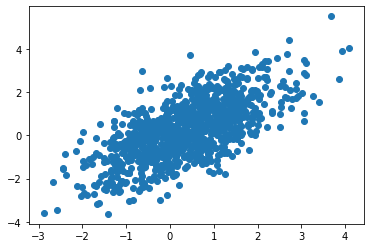

In [11]:
plt.scatter(A,B)

In [132]:
LA=np.concatenate((L,A),axis=1)

In [133]:
LA_shuffle=np.concatenate((L_shuffle,A),axis=1)

In [134]:
LA_shuffle

array([[ 1.        ,  0.03939705],
       [ 0.        , -1.58160513],
       [ 1.        ,  1.1956219 ],
       ...,
       [ 1.        ,  0.20011739],
       [ 0.        , -0.38552321],
       [ 1.        ,  0.5741199 ]])

In [15]:
torch.tensor(A)

tensor([[ 3.9397e-02],
        [-1.5816e+00],
        [ 1.1956e+00],
        [ 3.0056e+00],
        [ 1.3556e-01],
        [-1.1022e-01],
        [-1.6161e+00],
        [-5.3464e-01],
        [-1.0290e+00],
        [ 1.0577e-01],
        [ 1.0270e+00],
        [ 3.0509e-01],
        [-2.2832e-01],
        [ 6.9551e-01],
        [ 1.8903e-01],
        [ 1.4514e+00],
        [ 1.2293e+00],
        [ 1.2458e+00],
        [-7.0381e-02],
        [ 8.1913e-01],
        [ 6.5133e-01],
        [ 4.6835e-01],
        [ 1.6147e+00],
        [ 1.5067e+00],
        [ 9.4582e-01],
        [-1.3697e+00],
        [ 1.0507e-01],
        [-1.3440e+00],
        [-1.2065e+00],
        [-3.0597e-01],
        [ 7.2445e-01],
        [-6.0053e-01],
        [ 1.8610e-01],
        [-6.6839e-01],
        [-8.7922e-01],
        [ 2.2171e+00],
        [ 5.8410e-01],
        [ 1.7152e-01],
        [-2.0509e-01],
        [ 1.9390e-01],
        [-1.2100e+00],
        [-9.5954e-01],
        [ 8.0247e-01],
        [-1

In [135]:
tensor_x = torch.Tensor(LA) # transform to torch tensor
tensor_y = torch.Tensor(B)

my_dataset = TensorDataset(tensor_x,tensor_y) # create your datset
train_loader = DataLoader(my_dataset,batch_size=64,shuffle=True) # c

In [136]:
tensor_xs = torch.Tensor(LA_shuffle) # transform to torch tensor
tensor_ys = torch.Tensor(B)

my_dataset_s = TensorDataset(tensor_xs,tensor_ys) # create your datset
train_loader_s = DataLoader(my_dataset_s,batch_size=64,shuffle=True) # c

In [154]:
#next(iter(train_loader))

In [137]:
class NLMR(nn.Module):
    def __init__(self,input_size=1):
        super(NLMR, self).__init__()
        self.input_size=input_size
        self.layer1 = nn.Linear(self.input_size, 15)
        self.layer2 = nn.Linear(15,15)
        self.layer3=nn.Linear(15,1)
    def forward(self,x):
        x=F.relu(self.layer1(x))
        x=F.relu(self.layer2(x))
        x=self.layer3(x)
        return x
        

In [138]:
torch.manual_seed(0)
random.seed(0)
np.random.seed(0)

In [139]:
model = NLMR(2).to(device)
print(model)

NLMR(
  (layer1): Linear(in_features=2, out_features=15, bias=True)
  (layer2): Linear(in_features=15, out_features=15, bias=True)
  (layer3): Linear(in_features=15, out_features=1, bias=True)
)


In [140]:
learning_rate = 1e-3
batch_size = 32
epochs = 5

In [141]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [109]:
for i, data in enumerate(train_loader, 0):
    print(data)

[tensor([[ 1.0000,  1.5206],
        [ 1.0000, -0.9453],
        [ 0.0000,  0.1653],
        [ 1.0000, -0.2034],
        [ 0.0000,  0.4637],
        [ 1.0000,  0.6927],
        [ 1.0000, -1.1065],
        [ 0.0000, -0.0756],
        [ 0.0000, -0.1160],
        [ 0.0000,  1.4367],
        [ 1.0000, -1.2867],
        [ 1.0000,  1.9797],
        [ 0.0000,  1.6542],
        [ 1.0000,  1.1574],
        [ 1.0000, -0.2307],
        [ 0.0000,  0.5380],
        [ 0.0000,  0.5782],
        [ 0.0000, -1.1796],
        [ 1.0000,  0.0102],
        [ 0.0000, -0.8034],
        [ 1.0000,  1.0731],
        [ 1.0000, -0.6189],
        [ 1.0000,  0.4837],
        [ 1.0000,  0.3535],
        [ 0.0000,  1.6547],
        [ 1.0000,  0.1861],
        [ 0.0000,  0.0060],
        [ 1.0000, -1.4710],
        [ 0.0000, -0.0682],
        [ 0.0000,  0.8378],
        [ 0.0000, -2.8716],
        [ 1.0000,  1.4090],
        [ 1.0000, -0.0477],
        [ 1.0000,  0.8610],
        [ 0.0000, -1.1316],
        [ 1.0000, -

In [142]:

for epoch in range(100):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs=data[0]
        labels = data[1]
            
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        #print(inputs,labels,outputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        #print(running_loss)
        if i % 5 == 4:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 5:.3f}')
            running_loss = 0.0

[1,     5] loss: 1.981
[1,    10] loss: 2.032
[1,    15] loss: 2.008
[2,     5] loss: 2.108
[2,    10] loss: 2.028
[2,    15] loss: 1.860
[3,     5] loss: 2.110
[3,    10] loss: 1.836
[3,    15] loss: 1.948
[4,     5] loss: 1.806
[4,    10] loss: 2.005
[4,    15] loss: 2.047
[5,     5] loss: 1.882
[5,    10] loss: 1.809
[5,    15] loss: 2.091
[6,     5] loss: 1.871
[6,    10] loss: 1.847
[6,    15] loss: 2.072
[7,     5] loss: 1.964
[7,    10] loss: 2.087
[7,    15] loss: 1.652
[8,     5] loss: 1.959
[8,    10] loss: 1.819
[8,    15] loss: 1.888
[9,     5] loss: 1.738
[9,    10] loss: 1.907
[9,    15] loss: 1.959
[10,     5] loss: 1.638
[10,    10] loss: 2.126
[10,    15] loss: 1.802
[11,     5] loss: 1.989
[11,    10] loss: 1.800
[11,    15] loss: 1.765
[12,     5] loss: 1.824
[12,    10] loss: 1.806
[12,    15] loss: 1.797
[13,     5] loss: 1.807
[13,    10] loss: 1.841
[13,    15] loss: 1.854
[14,     5] loss: 1.892
[14,    10] loss: 1.853
[14,    15] loss: 1.773
[15,     5] loss: 1

In [34]:
loss_first

NameError: name 'loss_first' is not defined

In [243]:
dataiter = iter(train_loader)

In [78]:
outputs=[]
for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs=data[0]
        labels = data[1]
        

        # forward 
        outputs.append(model(inputs))
        #print(inputs,labels,outputs)

        # print statistics

In [79]:
outputs

[tensor([[  0.5701],
         [  1.2486],
         [ -2.8434],
         [  2.3523],
         [-12.0356],
         [  6.4433],
         [-10.3061],
         [ -2.8573],
         [ -6.2675],
         [ -1.3985],
         [  8.7657],
         [-20.6312],
         [ -5.7012],
         [ -7.3597],
         [ -6.2412],
         [ -3.5109],
         [ -8.3280],
         [ -2.1085],
         [ 18.7715],
         [ -0.2897],
         [  5.7966],
         [-13.5004],
         [ -2.6462],
         [-18.6830],
         [-12.8350],
         [ -3.0256],
         [ 12.9027],
         [ 21.4583],
         [ -8.9226],
         [  5.5716],
         [  7.3920],
         [ -5.7943],
         [ 10.2328],
         [ -1.5793],
         [-13.8837],
         [ -1.7050],
         [-13.1817],
         [-13.6676],
         [  8.7545],
         [ 18.1841],
         [  2.1999],
         [  3.7827],
         [-18.5866],
         [  0.1364],
         [  1.7669],
         [ -1.4623],
         [ 10.7767],
         [ -2

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

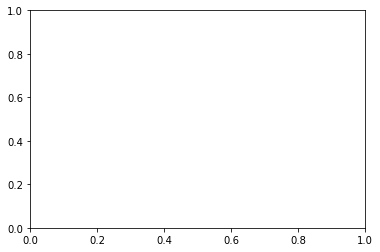

In [242]:
plt.scatter(A,model(torch.Tensor(A)))

In [143]:
loss_first=[]
for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs=data[0]
        labels = data[1]
        

        # forward 
        output=model(inputs)
        loss_first.append(loss_fn(output, labels))

In [144]:
sum(loss_first)

tensor(17.6993, grad_fn=<AddBackward0>)

In [54]:
#setting the L weights to zero
with torch.no_grad():
    for i, param in enumerate(model.parameters()):
        #param[1][1:,0]
            if(i==0):
                print(param)
                #either set it to zero or shuffle it 
                #cant shuffle weights 
                #better to shuffle the input 
                #set to zero
                #param[:,0]=0
                #shuffling it 
                #print(param[:,0].shape[0])
                indexes = torch.randperm(param[:,0].shape[0])
                param[:,0] = param[:,0][indexes]
                #np.random.shuffle(param[:,0])
        #torch.ones_like(param)

Parameter containing:
tensor([[ 0.0025,  0.4742],
        [-0.5064, -0.6913],
        [-0.2624,  0.2287],
        [-0.0088,  0.6955],
        [-0.0377,  0.2736],
        [-0.2089, -0.1150],
        [-0.6498, -0.7386],
        [-0.2840, -0.1569],
        [ 0.3054,  0.7336],
        [-0.3845, -0.8010],
        [ 0.2338,  0.8053],
        [-0.0969,  0.9606],
        [-0.1032,  0.1775],
        [ 0.6513, -1.0024],
        [-0.4496, -0.4659]], requires_grad=True)


In [55]:
#checking whether the weights are set to zero
for i, param in enumerate(model.parameters()):
        #param[1][1:,0]
            if(i==0):
                print(param)

Parameter containing:
tensor([[-0.0377,  0.4742],
        [ 0.0025, -0.6913],
        [-0.2089,  0.2287],
        [-0.5064,  0.6955],
        [-0.0969,  0.2736],
        [ 0.2338, -0.1150],
        [ 0.3054, -0.7386],
        [-0.2624, -0.1569],
        [-0.0088,  0.7336],
        [-0.6498, -0.8010],
        [-0.3845,  0.8053],
        [-0.1032,  0.9606],
        [-0.2840,  0.1775],
        [-0.4496, -1.0024],
        [ 0.6513, -0.4659]], requires_grad=True)


In [145]:
outputs=[]
loss=[]
for i, data in enumerate(train_loader_s, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs=data[0]
        labels = data[1]
        

        # forward 
        output=model(inputs)
        outputs.append(output)
        loss.append(loss_fn(output, labels))
        #print(inputs,labels,outputs)

        # print statistics

In [146]:
loss

[tensor(1.1245, grad_fn=<MseLossBackward0>),
 tensor(0.9345, grad_fn=<MseLossBackward0>),
 tensor(1.0390, grad_fn=<MseLossBackward0>),
 tensor(1.0493, grad_fn=<MseLossBackward0>),
 tensor(0.9811, grad_fn=<MseLossBackward0>),
 tensor(0.7527, grad_fn=<MseLossBackward0>),
 tensor(1.0450, grad_fn=<MseLossBackward0>),
 tensor(1.0688, grad_fn=<MseLossBackward0>),
 tensor(1.3704, grad_fn=<MseLossBackward0>),
 tensor(1.2946, grad_fn=<MseLossBackward0>),
 tensor(1.3407, grad_fn=<MseLossBackward0>),
 tensor(1.3024, grad_fn=<MseLossBackward0>),
 tensor(1.1326, grad_fn=<MseLossBackward0>),
 tensor(0.9209, grad_fn=<MseLossBackward0>),
 tensor(1.2485, grad_fn=<MseLossBackward0>),
 tensor(1.1869, grad_fn=<MseLossBackward0>)]

In [147]:
loss_first

[tensor(1.0970, grad_fn=<MseLossBackward0>),
 tensor(0.9509, grad_fn=<MseLossBackward0>),
 tensor(1.0962, grad_fn=<MseLossBackward0>),
 tensor(1.2007, grad_fn=<MseLossBackward0>),
 tensor(0.8793, grad_fn=<MseLossBackward0>),
 tensor(0.9898, grad_fn=<MseLossBackward0>),
 tensor(1.3697, grad_fn=<MseLossBackward0>),
 tensor(1.4735, grad_fn=<MseLossBackward0>),
 tensor(0.9553, grad_fn=<MseLossBackward0>),
 tensor(0.9611, grad_fn=<MseLossBackward0>),
 tensor(0.9570, grad_fn=<MseLossBackward0>),
 tensor(1.2467, grad_fn=<MseLossBackward0>),
 tensor(1.3775, grad_fn=<MseLossBackward0>),
 tensor(1.2613, grad_fn=<MseLossBackward0>),
 tensor(0.9868, grad_fn=<MseLossBackward0>),
 tensor(0.8965, grad_fn=<MseLossBackward0>)]

In [148]:
sum(loss_first)

tensor(17.6993, grad_fn=<AddBackward0>)

In [149]:
sum(loss)

tensor(17.7919, grad_fn=<AddBackward0>)

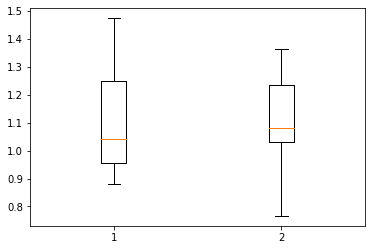

In [144]:
with torch.no_grad():
    plt.boxplot([loss_first,loss])

In [149]:
#checking whether model after setting weights to zero whether the weights will be updated
for epoch in range(100):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs=data[0]
        labels = data[1]
            
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        #print(inputs,labels,outputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        #print(running_loss)
        if i % 5 == 4:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 5:.3f}')
            running_loss = 0.0

[1,     5] loss: 1.137
[1,    10] loss: 1.183
[1,    15] loss: 1.011
[2,     5] loss: 0.994
[2,    10] loss: 1.159
[2,    15] loss: 1.090
[3,     5] loss: 1.018
[3,    10] loss: 1.209
[3,    15] loss: 1.038
[4,     5] loss: 1.073
[4,    10] loss: 1.091
[4,    15] loss: 1.111
[5,     5] loss: 1.102
[5,    10] loss: 1.154
[5,    15] loss: 1.024
[6,     5] loss: 1.030
[6,    10] loss: 1.173
[6,    15] loss: 1.079
[7,     5] loss: 1.124
[7,    10] loss: 1.120
[7,    15] loss: 1.019
[8,     5] loss: 1.070
[8,    10] loss: 1.063
[8,    15] loss: 1.122
[9,     5] loss: 1.143
[9,    10] loss: 1.070
[9,    15] loss: 1.008
[10,     5] loss: 0.993
[10,    10] loss: 1.084
[10,    15] loss: 1.111
[11,     5] loss: 1.057
[11,    10] loss: 1.088
[11,    15] loss: 1.055
[12,     5] loss: 1.116
[12,    10] loss: 1.113
[12,    15] loss: 0.974
[13,     5] loss: 1.053
[13,    10] loss: 1.108
[13,    15] loss: 1.107
[14,     5] loss: 1.200
[14,    10] loss: 1.122
[14,    15] loss: 0.929
[15,     5] loss: 1